In [411]:
import pandas as pd
import pickle

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.models import load_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [203]:
# read data in
heart_df = pd.read_csv("heart.csv")
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [204]:
# heart_df.describe(include='all')

In [205]:
# pairplot for all features in the dataset
# sns.pairplot(heart_df, hue='target')

In [206]:
# show feature corelatiion
# sns.heatmap(heart_df.corr(), annot=True)

In [434]:
# all columns but last
heart_features = heart_df.loc[:, heart_df.columns != 'target']

# scale features
sc = StandardScaler()
heart_features = sc.fit_transform(heart_features)

# only last column
heart_target = heart_df.iloc[:,-1]

In [469]:
# split into train/test tests
X_train, X_test, y_train, y_test = train_test_split(
    heart_features,
    heart_target,
    test_size=0.2
)

In [459]:
model = Sequential()
model.add(Dense(13, input_dim=13, activation='relu'))
# model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [460]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=2, verbose=0)

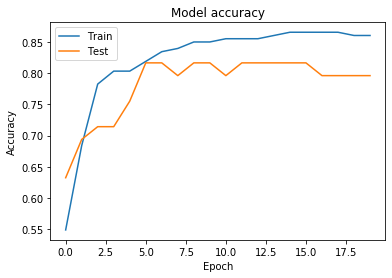

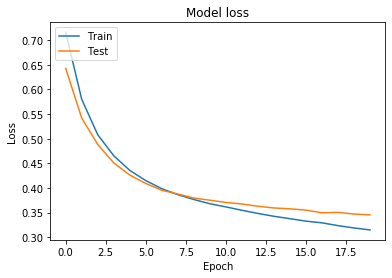

61/61 [==============================] - 0s 86us/step
Accuracy: 90.16


In [470]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

In [445]:
fn = "another_fine_model"
history_fn = fn + "-history"

# save model
model.save(fn + ".h5")

with open(history_fn, 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [473]:
model = load_model("another_fine_model.h5")

In [475]:
history = pickle.load(open(history_fn, "rb"))
    
# # Plot training & validation accuracy values
# plt.plot(history['acc'])
# plt.plot(history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

# # Plot training & validation loss values
# plt.plot(history['loss'])
# plt.plot(history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

EOFError: Ran out of input